# All

all notebooks in one here  
NOTE: most cells use variables from cells that are above. it is recommended to run all cells above a certain cell before running the cell.


# Data import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import scipy.stats as stats
import pandas as pd

plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

import gspread
from oauth2client.service_account import ServiceAccountCredentials

gc = gspread.service_account(filename='credentials.json')
gsheet = gc.open_by_key('1svWmmaMlgArXB-xYvyDbQLzQB7mDYcnbrhIknNa0uaA')

log = gsheet.get_worksheet_by_id(1136380323)

def custom_int_parse(cell: gspread.Cell):
    value = cell.value
    try:
        return int(value)
    except ValueError:
        return np.nan

def nan_to_0(val: int):
    if np.isnan(val):
        return 0
    else:
        return val

def int_wrapper(val: any):
    return int(val)

indices9 = np.array(list(map(custom_int_parse, log.range('A3:A32'))))
names9 = np.array(list(map(lambda cell: cell.value, log.range('B3:B32'))))
choices9 = np.array(list(map(custom_int_parse, log.range('C3:C32'))))

freqs9 = pd.Series(choices9).value_counts().sort_index()
freqs9['no_response'] = len(choices9) - freqs9.sum()

data9 = np.array([indices9, names9, choices9]).T
df9 = pd.DataFrame(data9, columns=['Index', 'Name', 'Choice'])

indices10 = np.array(list(map(custom_int_parse, log.range('D3:D32'))))
names10 = np.array(list(map(lambda cell: cell.value, log.range('E3:E32'))))
choices10 = np.array(list(map(custom_int_parse, log.range('F3:F32'))))

freqs10 = pd.Series(choices10).value_counts().sort_index()
freqs10['no_response'] = len(choices10) - freqs10.sum()

data10 = np.array([indices10, names10, choices10]).T
df10 = pd.DataFrame(data10, columns=['Index', 'Name', 'Choice'])

indices11 = np.array(list(map(custom_int_parse, log.range('G3:G32'))))
names11 = np.array(list(map(lambda cell: cell.value, log.range('H3:H32'))))
choices11 = np.array(list(map(custom_int_parse, log.range('I3:I32'))))

freqs11 = pd.Series(choices11).value_counts().sort_index()
freqs11['no_response'] = len(choices11) - freqs11.sum()

data11 = np.array([indices11, names11, choices11]).T
df11 = pd.DataFrame(data11, columns=['Index', 'Name', 'Choice'])

indices12 = np.array(list(map(custom_int_parse, log.range('J3:J32'))))
names12 = np.array(list(map(lambda cell: cell.value, log.range('K3:K32'))))
choices12 = np.array(list(map(custom_int_parse, log.range('L3:L32'))))

freqs12 = pd.Series(choices12).value_counts().sort_index()
freqs12['no_response'] = len(choices12) - freqs12.sum()

data12 = np.array([indices12, names12, choices12]).T
df12 = pd.DataFrame(data12, columns=['Index', 'Name', 'Choice'])

dflog = pd.concat([df9, df10, df11, df12], axis=1)
dflog.columns = pd.MultiIndex.from_product([['9th', '10th', '11th', '12th'], ['Index', 'Name', 'Choice']])

# Tests

chi-squared etc.

In [2]:
dfcounts = pd.concat([freqs9, freqs10, freqs11, freqs12], axis=1)
dfcounts.columns = ['9th', '10th', '11th', '12th']
dfcounts.set_index(pd.Index([str(i) for i in range(1, 11)]).append(pd.Index(['no_response'])), inplace=True)
dfcounts.fillna(0, inplace=True)
dfcounts = dfcounts.applymap(int_wrapper)
dfcounts['Total'] = dfcounts.sum(axis=1)

display(dfcounts)

dfcounts_raw = dfcounts.copy().drop('Total', axis = 1).drop('no_response', axis = 0)

gof_chisq, gof_pval = stats.chisquare(dfcounts['Total'].drop('no_response'))
print(f'gof_chisq: {gof_chisq}')
print(f'gof_pval: {gof_pval}')

indep_chisq, indep_pval, indep_dof, indep_expected = stats.chi2_contingency(dfcounts_raw.values)
print(f'indep_chisq: {indep_chisq}')
print(f'indep_pval: {indep_pval}')
dfexpected = pd.DataFrame(indep_expected, index=dfcounts_raw.index, columns=dfcounts_raw.columns)
print('indep_observed:')
display(dfcounts_raw)
print('indep_expected:')
display(dfexpected)
dfdiff = dfcounts_raw - dfexpected
print('indep_diff:')
display(dfdiff)

,9th,10th,11th,12th,Total
1,2,1,3,0,6
2,1,3,2,3,9
3,2,2,0,7,11
4,2,2,6,1,11
5,1,2,1,0,4
6,4,4,1,4,13
7,6,3,4,4,17
8,3,4,5,1,13
9,1,3,3,1,8
10,1,5,0,2,8


gof_chisq: 13.000000000000002
gof_pval: 0.16260626219029933
indep_chisq: 35.97301760473116
indep_pval: 0.11588966918108724
indep_observed:


,9th,10th,11th,12th
1,2,1,3,0
2,1,3,2,3
3,2,2,0,7
4,2,2,6,1
5,1,2,1,0
6,4,4,1,4
7,6,3,4,4
8,3,4,5,1
9,1,3,3,1
10,1,5,0,2


indep_expected:


,9th,10th,11th,12th
1,1.38,1.74,1.50,1.38
2,2.07,2.61,2.25,2.07
3,2.53,3.19,2.75,2.53
4,2.53,3.19,2.75,2.53
5,0.92,1.16,1.00,0.92
6,2.99,3.77,3.25,2.99
7,3.91,4.93,4.25,3.91
8,2.99,3.77,3.25,2.99
9,1.84,2.32,2.00,1.84
10,1.84,2.32,2.00,1.84


indep_diff:


,9th,10th,11th,12th
1,0.62,-0.74,1.50,-1.38
2,-1.07,0.39,-0.25,0.93
3,-0.53,-1.19,-2.75,4.47
4,-0.53,-1.19,3.25,-1.53
5,0.08,0.84,0.00,-0.92
6,1.01,0.23,-2.25,1.01
7,2.09,-1.93,-0.25,0.09
8,0.01,0.23,1.75,-1.99
9,-0.84,0.68,1.00,-0.84
10,-0.84,2.68,-2.00,0.16


# Charts

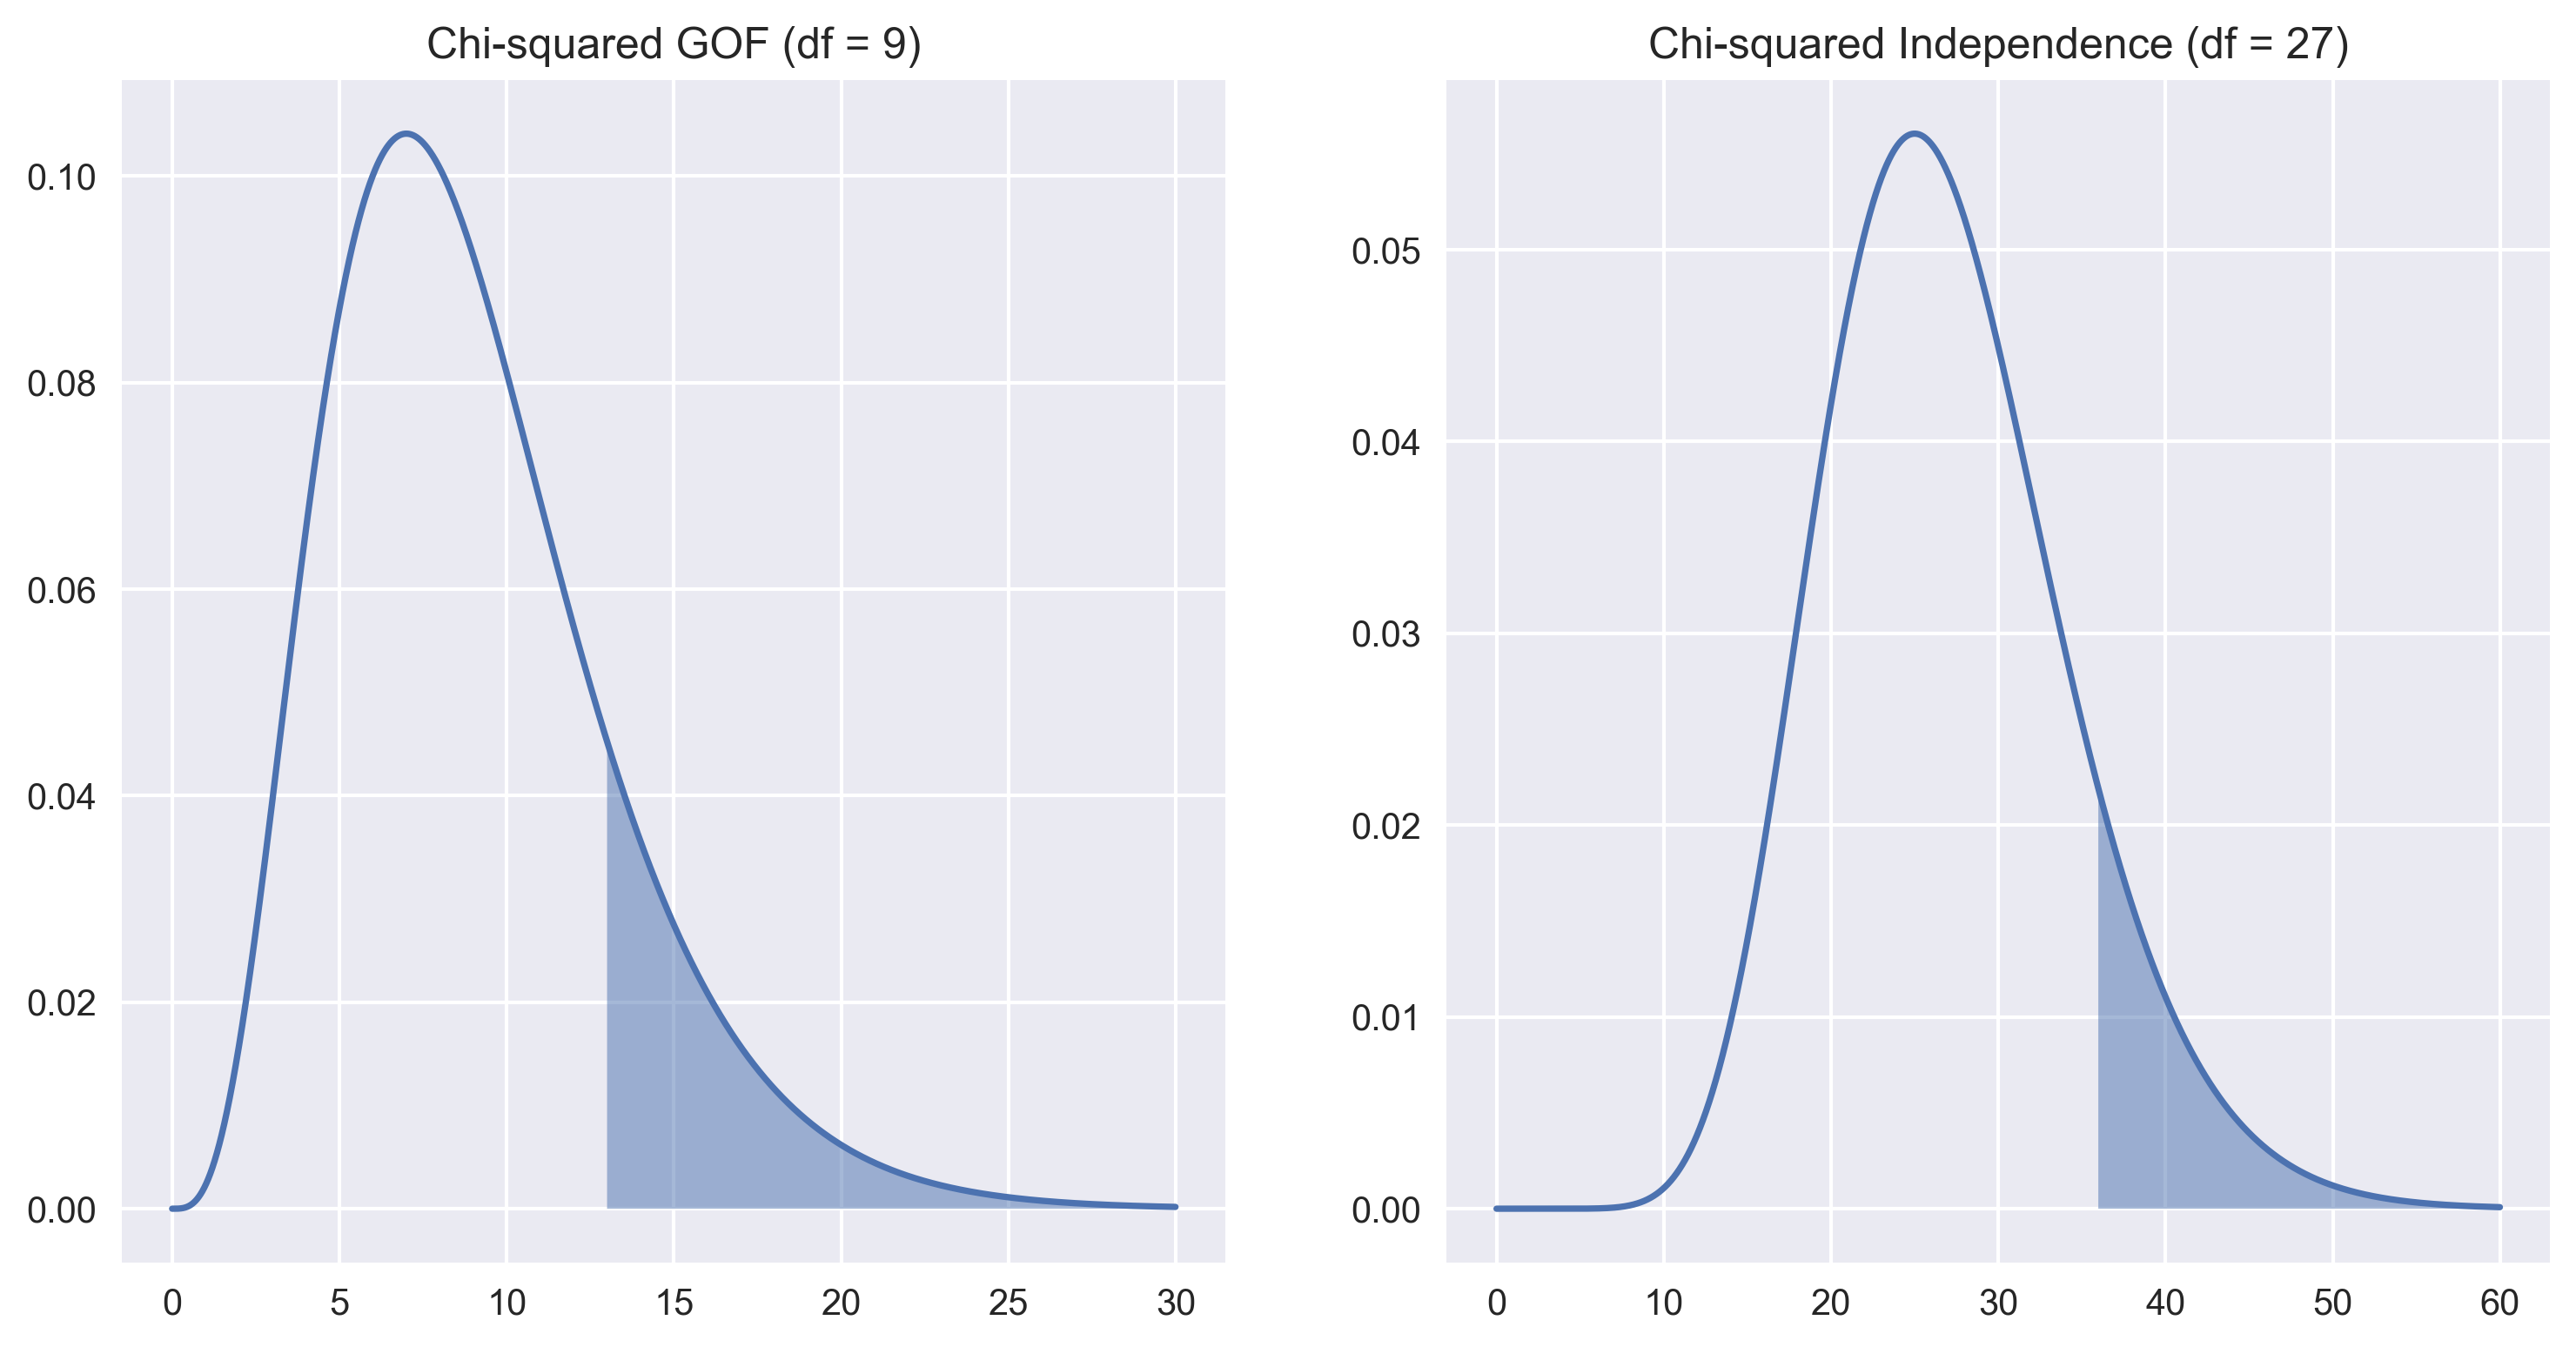

In [3]:
%matplotlib inline

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# gof and indep. chi-square test
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.patch.set_facecolor('white')

x1 = np.arange(0, 30, 0.01)
ax1.plot(x1, stats.chi2.pdf(x1, df = 9))
ax1.set_title('Chi-squared GOF (df = 9)')
ax1.fill_between(x1, stats.chi2.pdf(x1, df = 9), where=(x1 >= 13), alpha = 0.5)

x2 = np.arange(0, 60, 0.01)
ax2.plot(x2, stats.chi2.pdf(x2, df = 27))
ax2.set_title('Chi-squared Independence (df = 27)')
ax2.fill_between(x2, stats.chi2.pdf(x2, df = 27), where=(x2 >= 35.9730), alpha = 0.5)

plt.show()

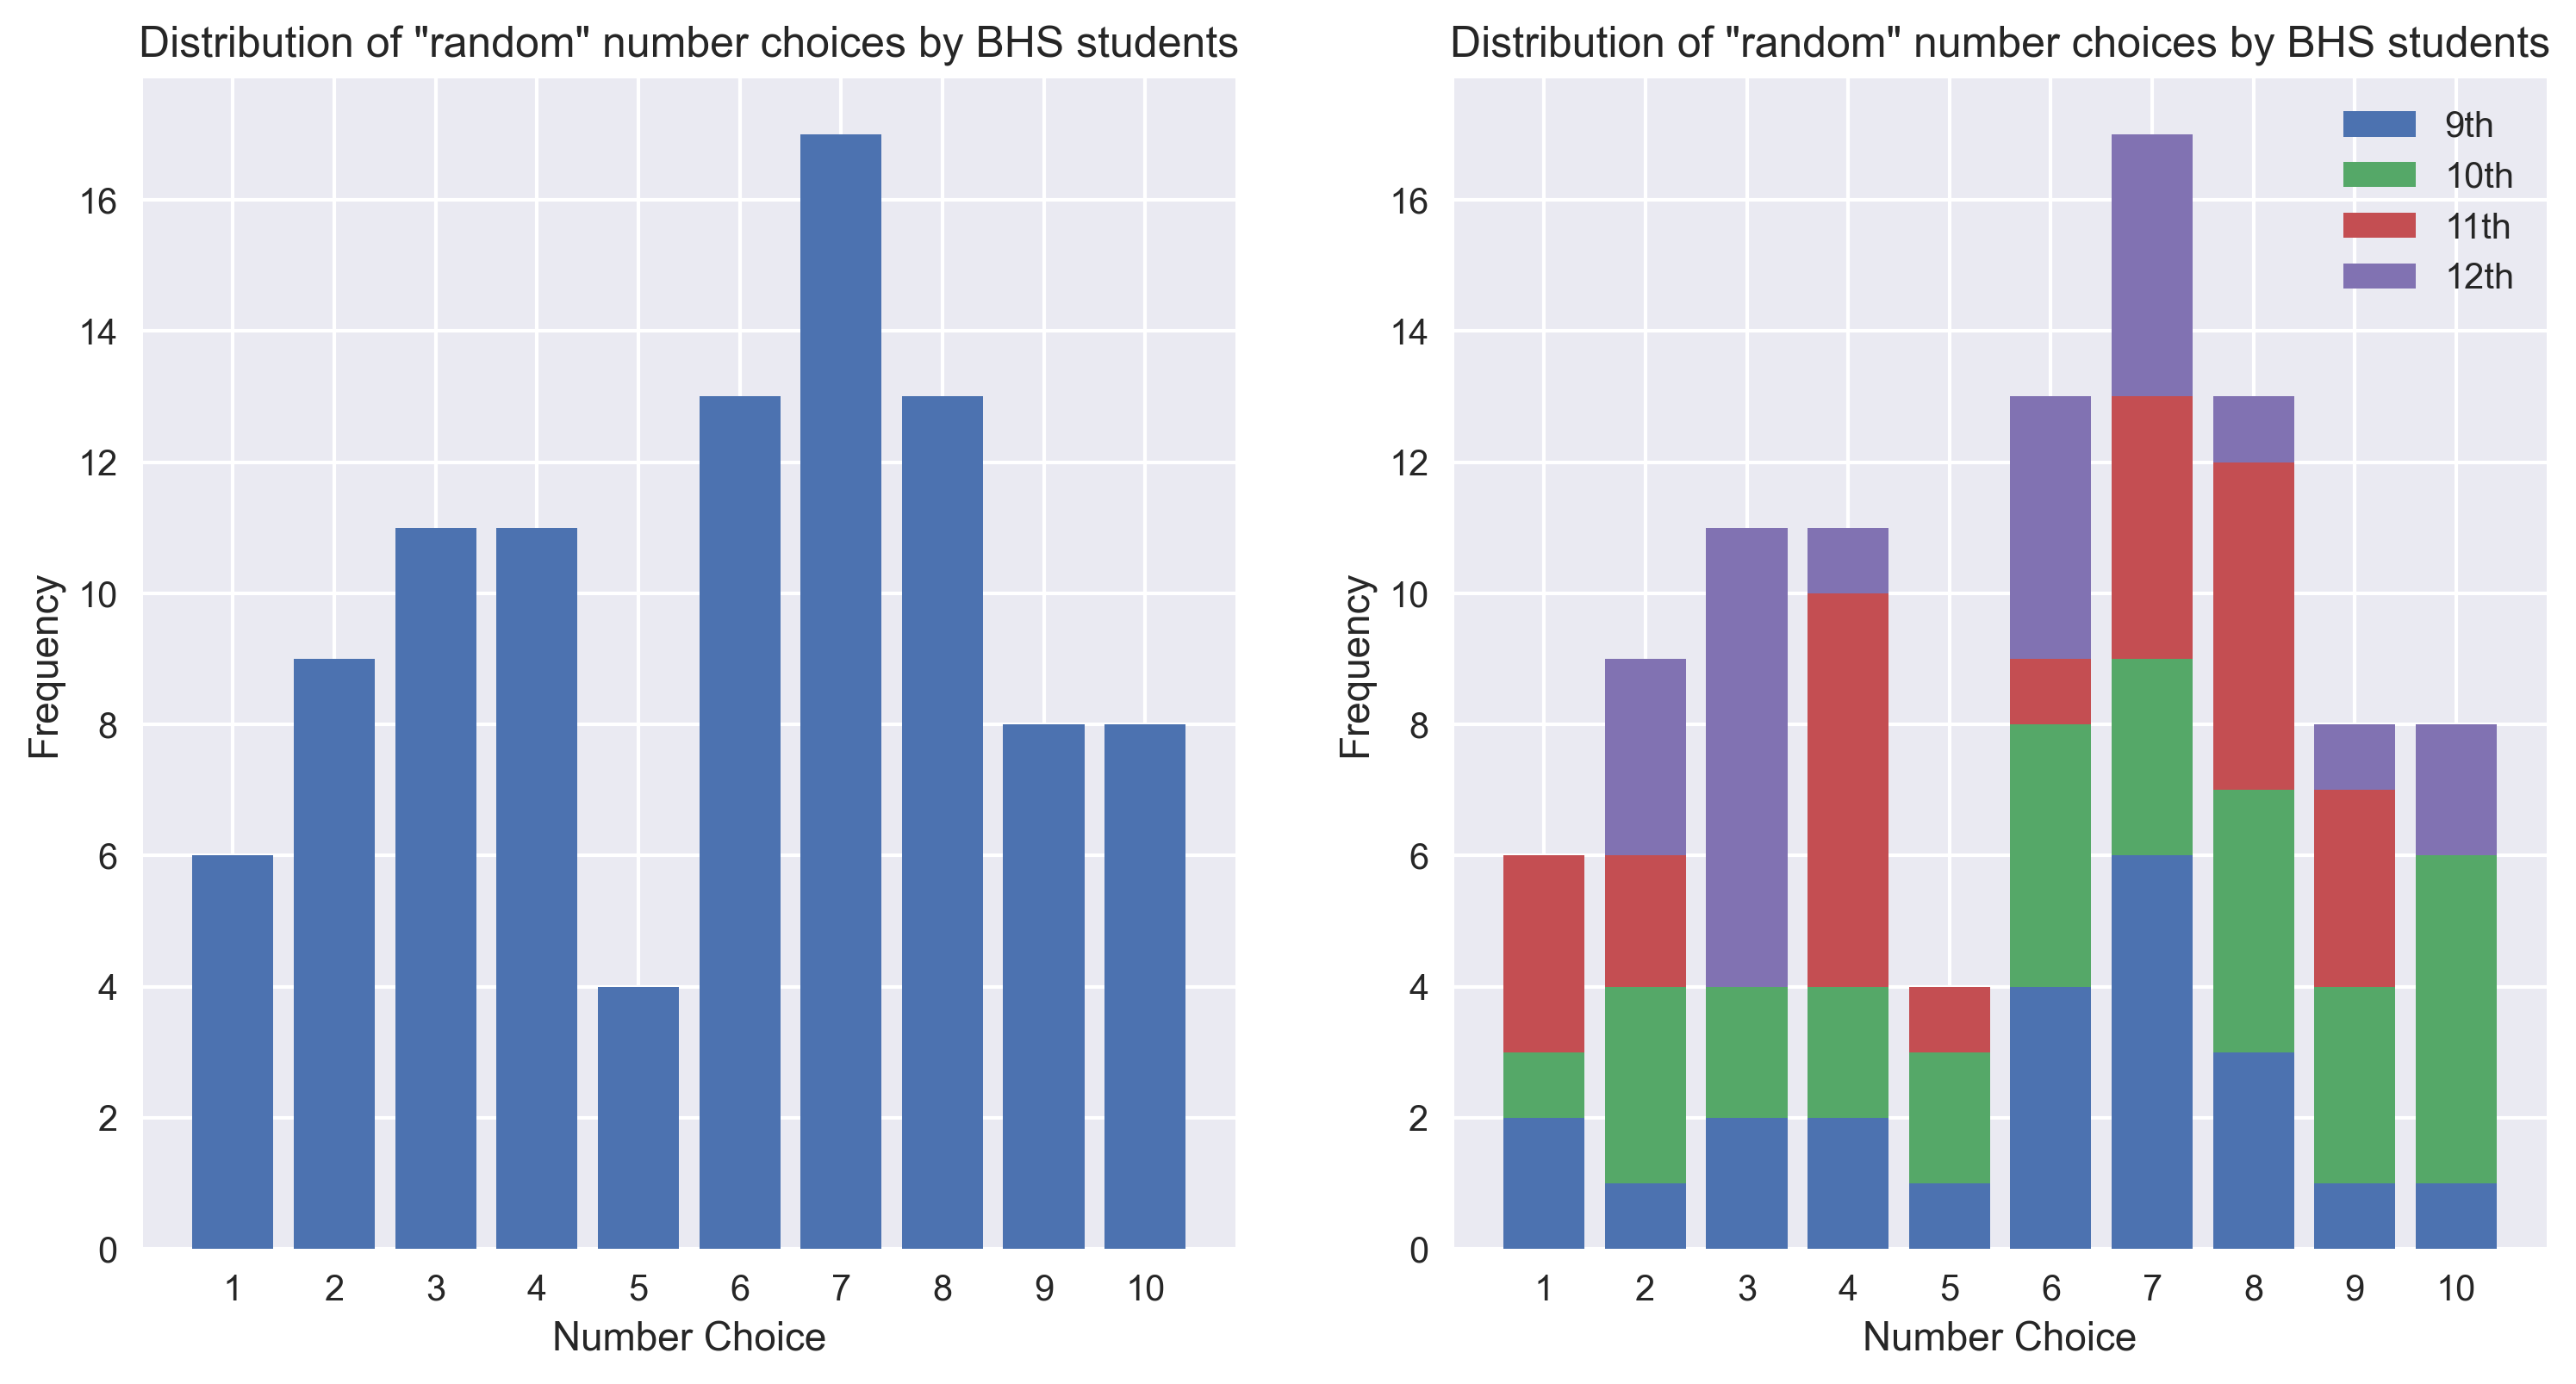

In [4]:
%matplotlib inline

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# bar charts (stacked and combined)
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6))
fig2.patch.set_facecolor('white')

ax3.bar(range(1, 11), dfcounts['Total'].drop('no_response'))
ax3.set_title('Distribution of "random" number choices by BHS students')
ax3.set_xlabel('Number Choice')
ax3.set_ylabel('Frequency')
ax3.set_xticks(range(1, 11))
ax3.set_xticklabels(range(1, 11))

ax4.bar(range(1, 11), dfcounts_raw['9th'], label='9th')
ax4.bar(range(1, 11), dfcounts_raw['10th'], bottom=dfcounts_raw['9th'], label='10th')
ax4.bar(range(1, 11), dfcounts_raw['11th'], bottom=dfcounts_raw['9th'] + dfcounts_raw['10th'], label='11th')
ax4.bar(range(1, 11), dfcounts_raw['12th'], bottom=dfcounts_raw['9th'] + dfcounts_raw['10th'] + dfcounts_raw['11th'], label='12th')
ax4.set_title('Distribution of "random" number choices by BHS students')
ax4.set_xlabel('Number Choice')
ax4.set_ylabel('Frequency')
ax4.set_xticks(range(1, 11))
ax4.set_xticklabels(range(1, 11))
ax4.legend()

plt.show()

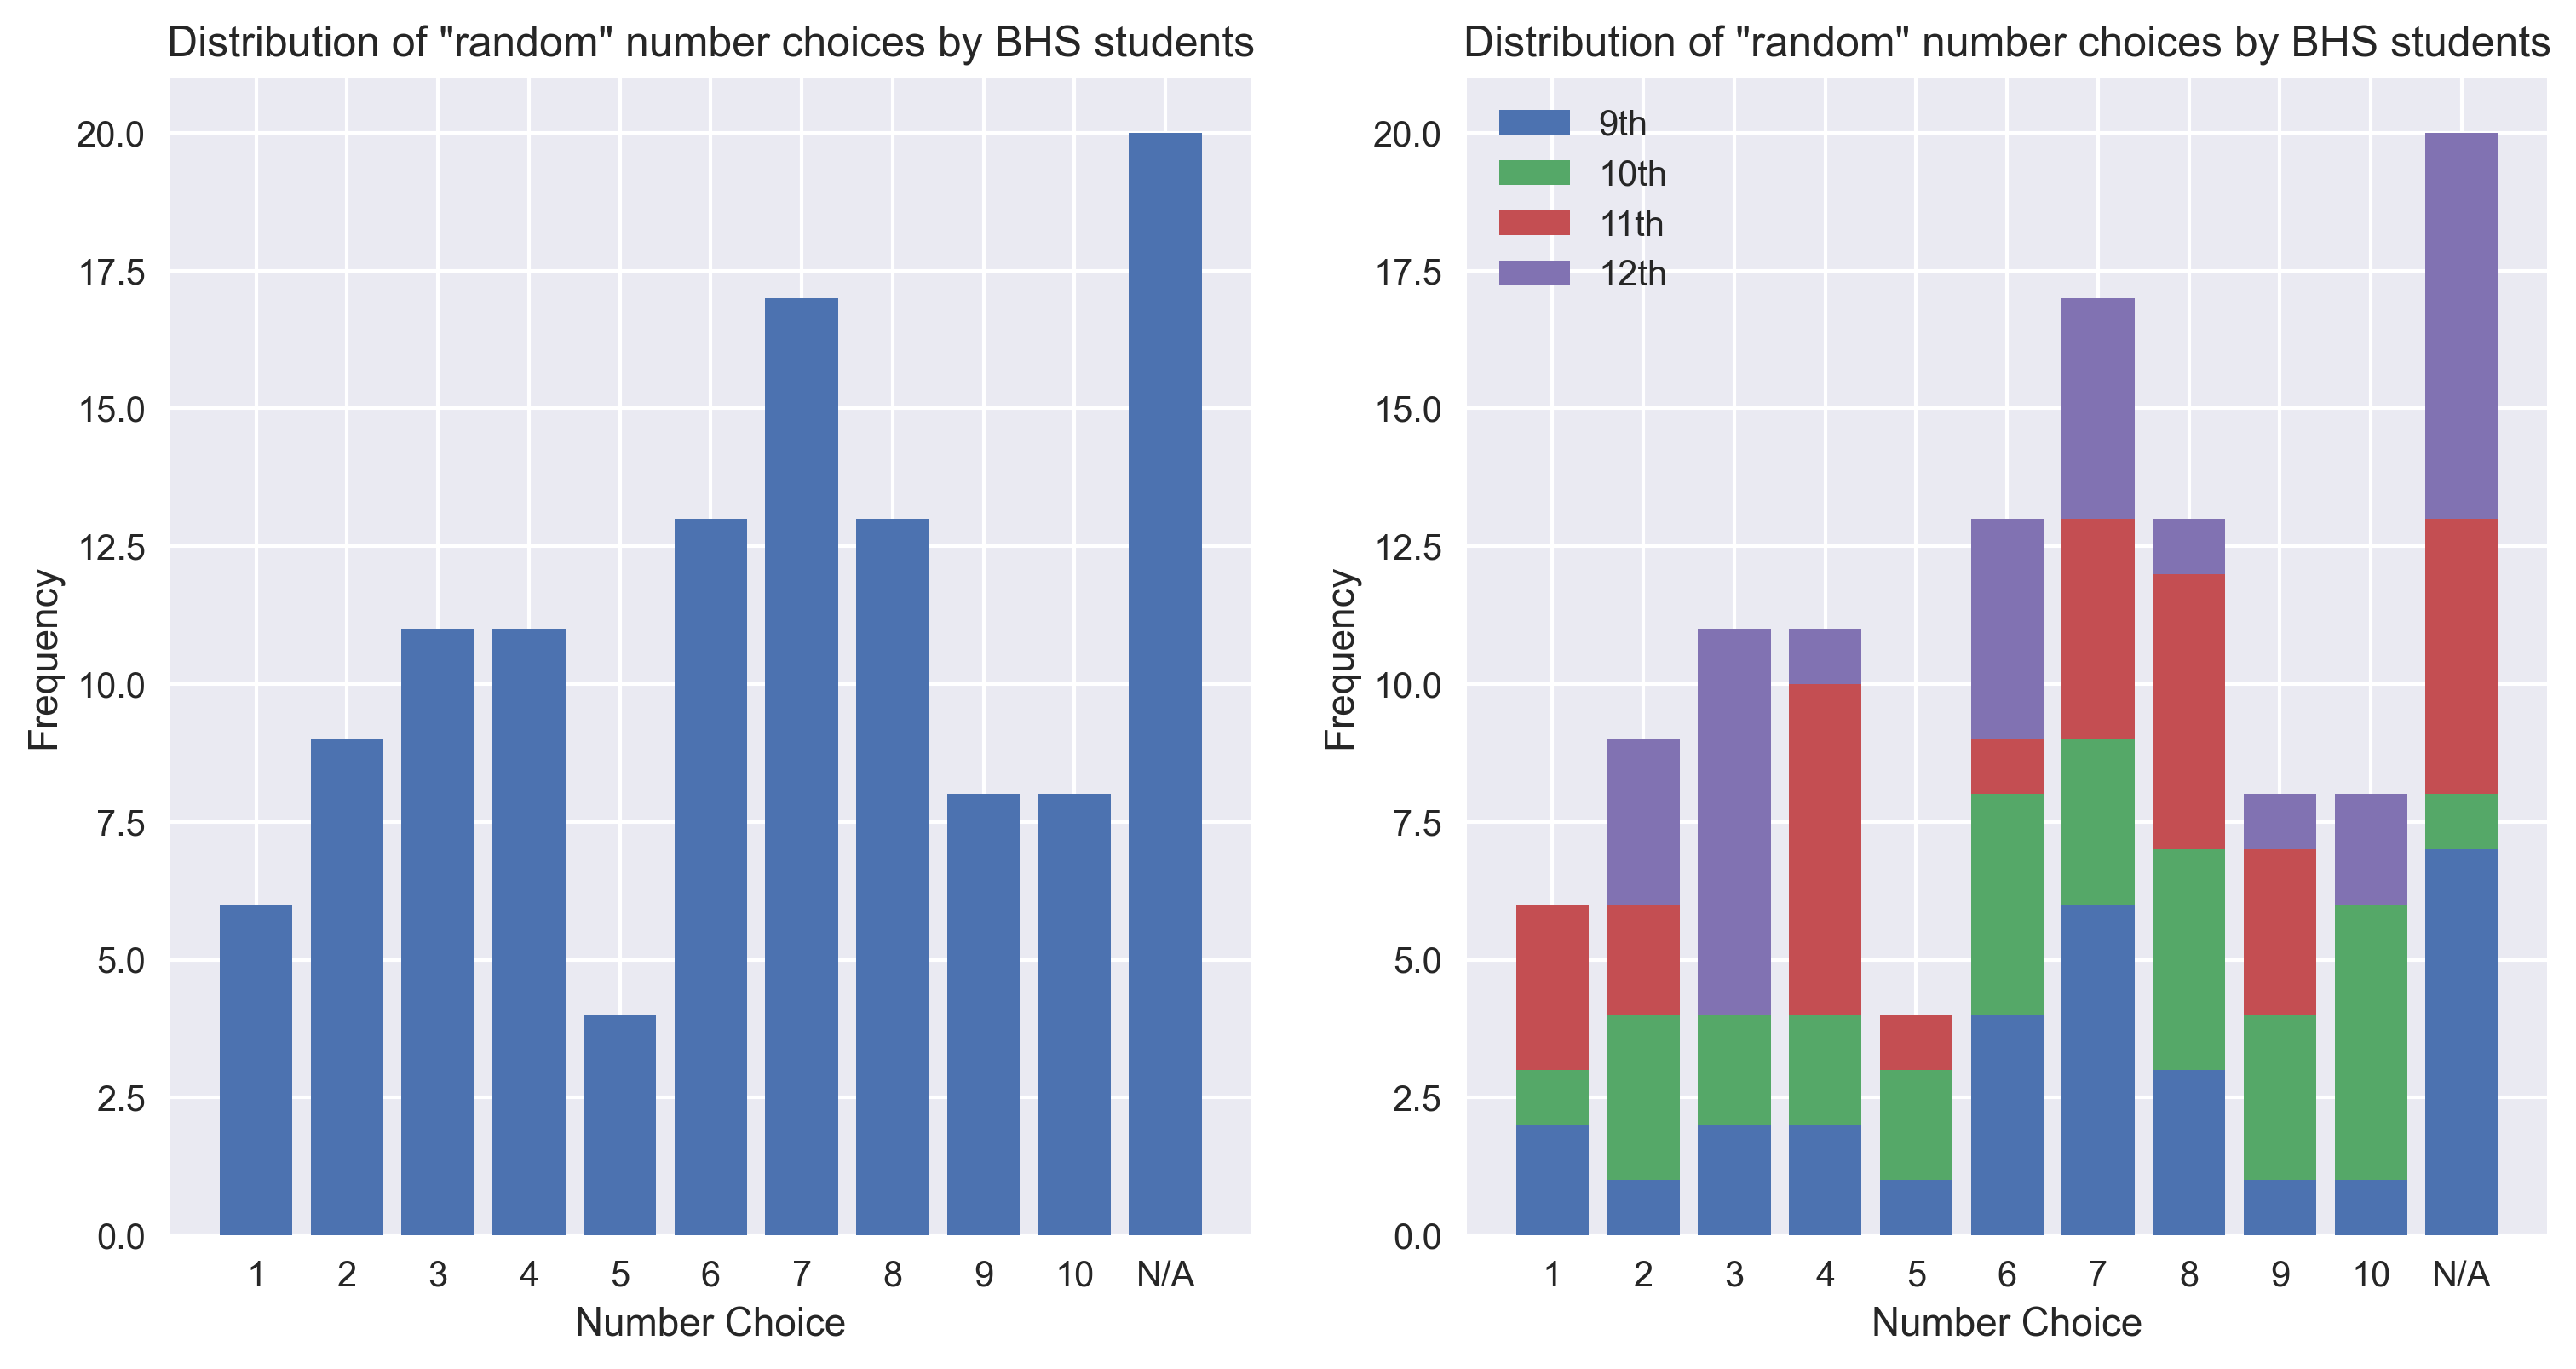

In [5]:
%matplotlib inline

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# bar charts (stacked and combined) including no_response
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(12, 6))

labels = [str(i) for i in range(1, 11)]
labels.append('N/A')

ax5.bar(range(1, 12), dfcounts['Total'])
ax5.set_title('Distribution of "random" number choices by BHS students')
ax5.set_xlabel('Number Choice')
ax5.set_ylabel('Frequency')
ax5.set_xticks(range(1, 12))
ax5.set_xticklabels(labels)

ax6.bar(range(1, 12), dfcounts['9th'], label='9th')
ax6.bar(range(1, 12), dfcounts['10th'], bottom=dfcounts['9th'], label='10th')
ax6.bar(range(1, 12), dfcounts['11th'], bottom=dfcounts['9th'] + dfcounts['10th'], label='11th')
ax6.bar(range(1, 12), dfcounts['12th'], bottom=dfcounts['9th'] + dfcounts['10th'] + dfcounts['11th'], label='12th')
ax6.set_title('Distribution of "random" number choices by BHS students')
ax6.set_xlabel('Number Choice')
ax6.set_ylabel('Frequency')
ax6.set_xticks(range(1, 12))
ax6.set_xticklabels(labels)
ax6.legend()

plt.show()

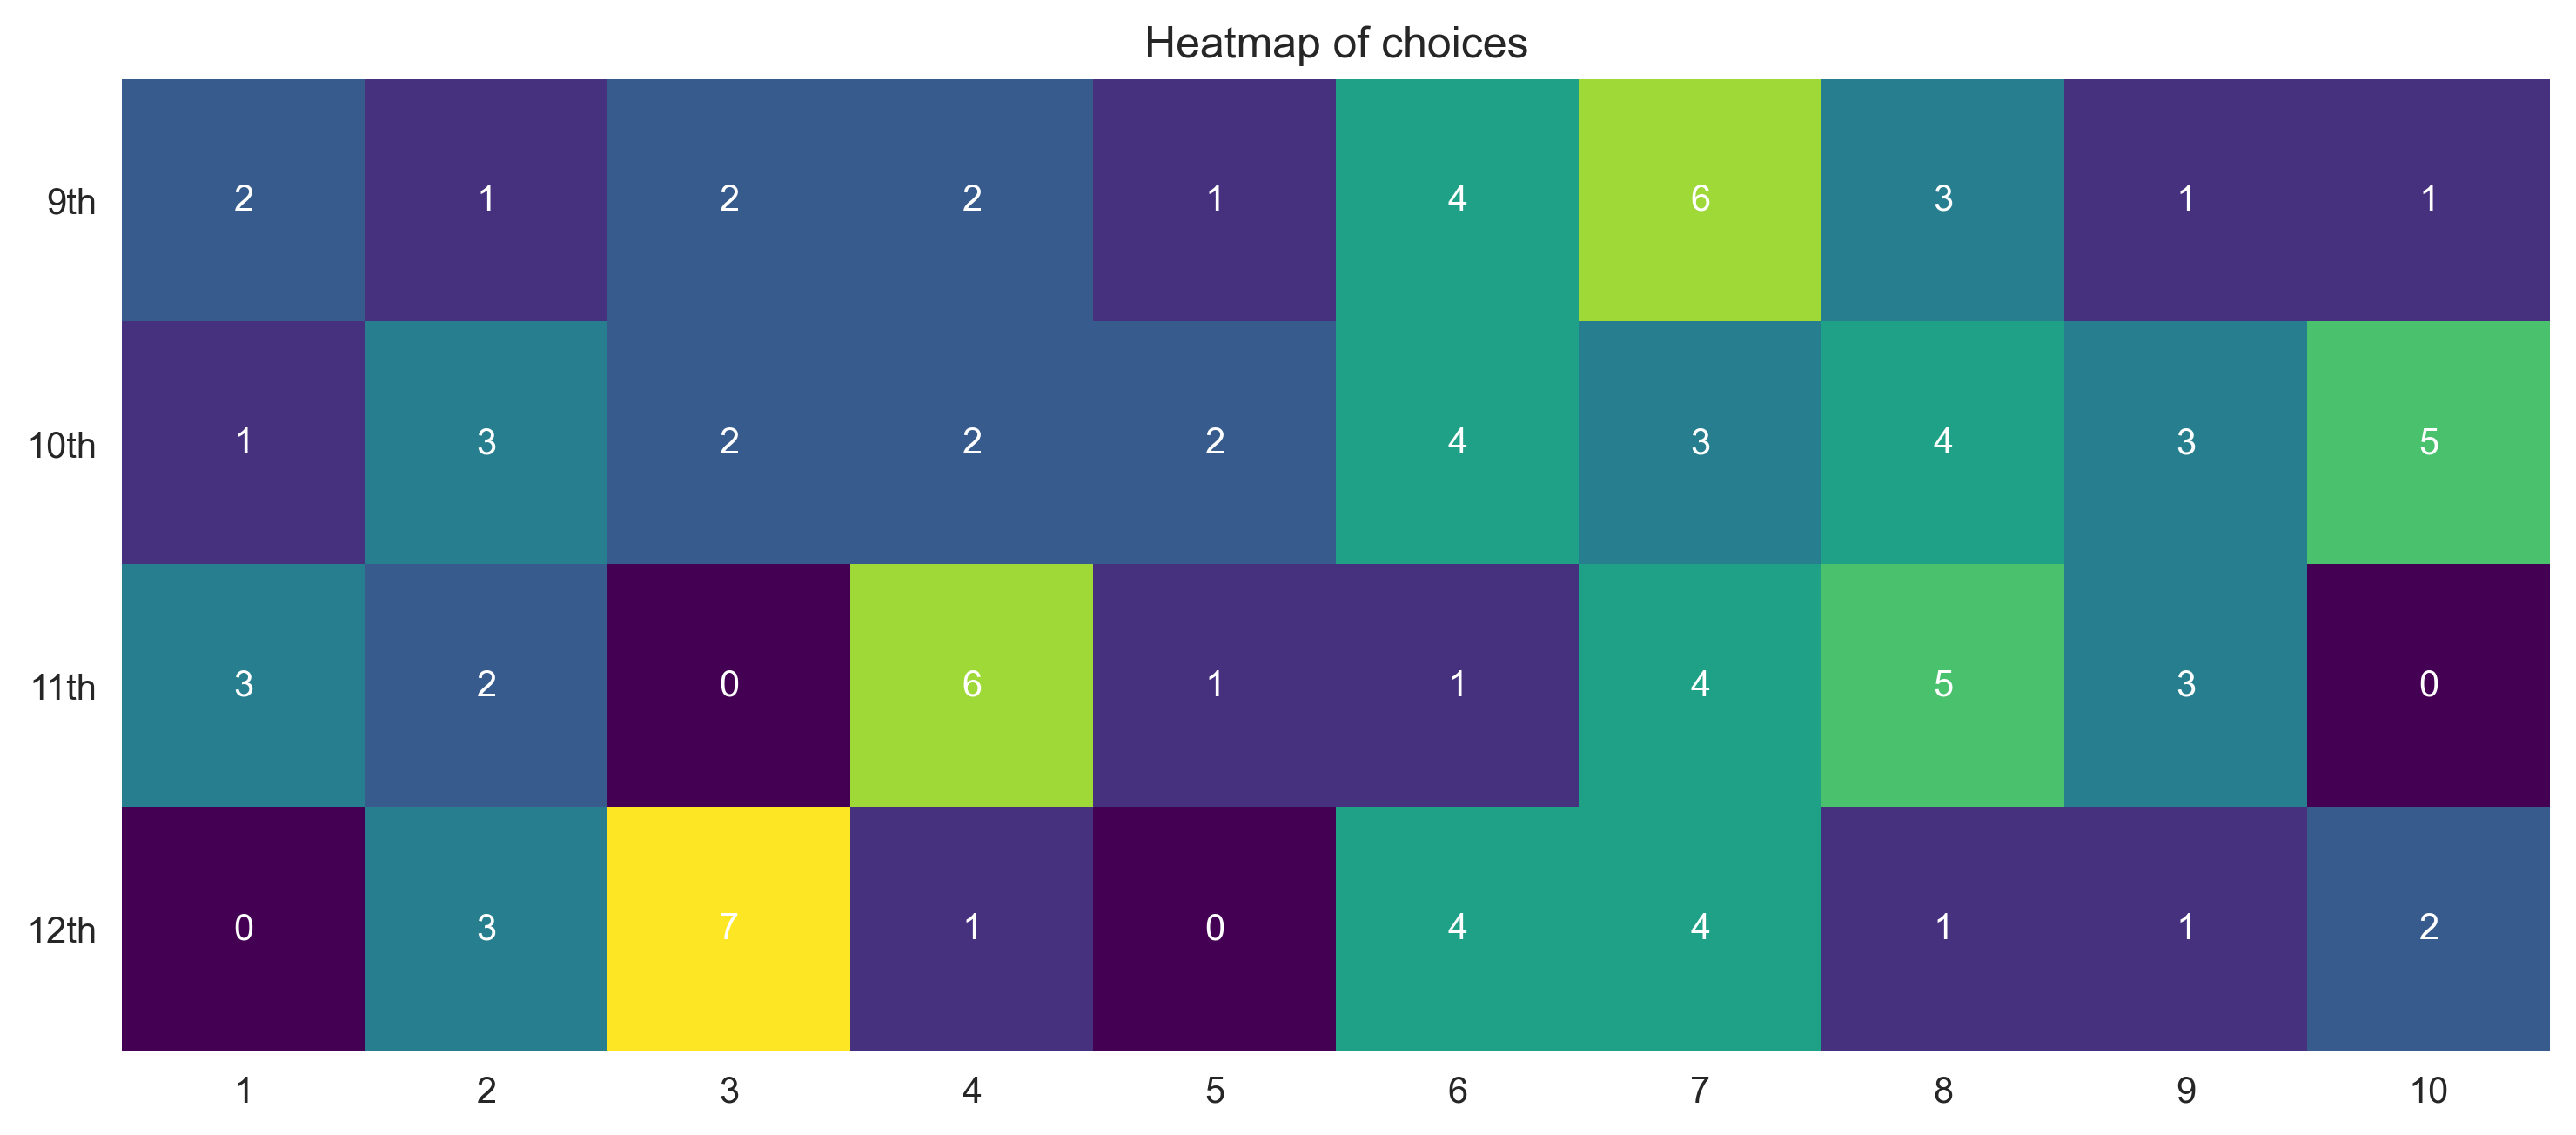

In [6]:
%matplotlib inline

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

fig4, ax7 = plt.subplots(1, 1, figsize=(12, 6))

ax7.imshow(dfcounts_raw.transpose(), cmap='viridis', interpolation='none')
ax7.set_xticks(np.arange(0, 10, 1), labels=np.arange(1, 11, 1))
ax7.set_yticks(np.arange(0, 4, 1), labels=['9th', '10th', '11th', '12th'])
ax7.grid(False)
ax7.set_title('Heatmap of choices')
for i in range(len(dfcounts_raw.columns)):
    for j in range(10):
        ax7.text(j, i, dfcounts_raw.iloc[j, i], ha='center', va='center', color='white')

plt.show()

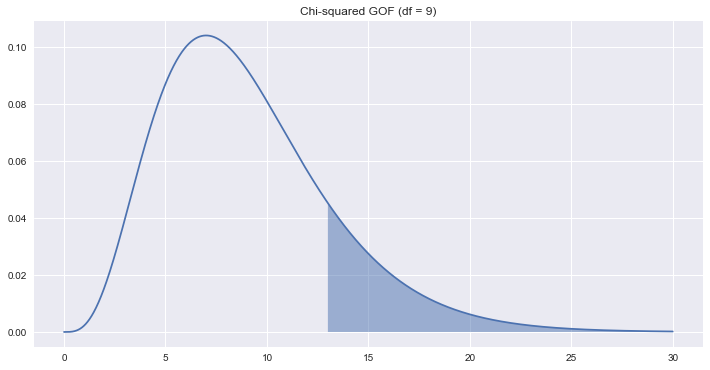

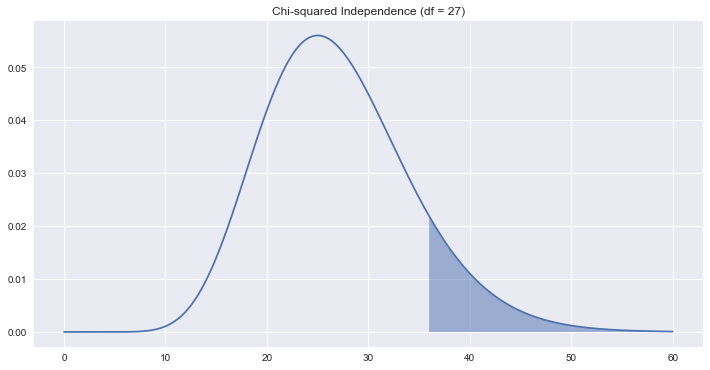

In [7]:
%matplotlib inline

# chisq shades in separate figures
fig5, ax8 = plt.subplots(1, 1, figsize=(12, 6))
fig6, ax9 = plt.subplots(1, 1, figsize=(12, 6))

ax8.plot(x1, stats.chi2.pdf(x1, df = 9))
ax8.set_title('Chi-squared GOF (df = 9)')
ax8.fill_between(x1, stats.chi2.pdf(x1, df = 9), where=(x1 >= 13), alpha = 0.5)

ax9.plot(x2, stats.chi2.pdf(x2, df = 27))
ax9.set_title('Chi-squared Independence (df = 27)')
ax9.fill_between(x2, stats.chi2.pdf(x2, df = 27), where=(x2 >= 35.9730), alpha = 0.5)

plt.show()

In [8]:
%matplotlib inline

def floatstr_to_intstr(x: str) -> str:
    if float(x) not in list(range(1, 11)):
        return 'N/A'
    try:
        return str(int(float(x)))
    except ValueError:
        return -1

_df9 = df9.copy()
_df9['Grade_level'] = 9

_df10 = df10.copy()
_df10['Grade_level'] = 10

_df11 = df11.copy()
_df11['Grade_level'] = 11

_df12 = df12.copy()
_df12['Grade_level'] = 12

dfall = pd.concat([_df9, _df10, _df11, _df12])
dfall.index = range(len(dfall))
dfall['Choice'] = dfall['Choice'].map(floatstr_to_intstr)

with open('raw_data_out.txt', 'w') as f:
    f.write(dfall.to_string())

dfall.to_csv('raw_data_out.csv')